In [ ]:
#V Andal Priyadharshini
#Vehicle Classification
from google.colab import files
uploaded = files.upload()
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle competitions download -c vehicle

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 70 Feb  2 05:39 kaggle.json
     |████████████████████████████████| 61kB 4.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=d543946a560665557c3c337ebbb467648a5bbbd112a13bb583b6bb014ece67a3
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10
100% 6.88G/6.88G [02:40<00:00, 31.3MB/s]
100% 6.88G/6.88G [02:40<00:00, 46.1MB/s]


In [ ]:
!unzip vehicle.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Motorcycle/003967_09.jpg  
  inflating: train/train/Motorcycle/003972_10.jpg  
  inflating: train/train/Motorcycle/003975_17.jpg  
  inflating: train/train/Motorcycle/003977_18.jpg  
  inflating: train/train/Motorcycle/003982_17.jpg  
  inflating: train/train/Motorcycle/003983_09.jpg  
  inflating: train/train/Motorcycle/003989_10.jpg  
  inflating: train/train/Motorcycle/003990_01.jpg  
  inflating: train/train/Motorcycle/003992_05.jpg  
  inflating: train/train/Motorcycle/003992_17.jpg  
  inflating: train/train/Motorcycle/003993_09.jpg  
  inflating: train/train/Motorcycle/003993_18.jpg  
  inflating: train/train/Motorcycle/003997_00.jpg  
  inflating: train/train/Motorcycle/003998_02.jpg  
  inflating: train/train/Motorcycle/003998_18.jpg  
  inflating: train/train/Motorcycle/003999_01.jpg  
  inflating: train/train/Motorcycle/004004_02.jpg  
  inflating: train/train/Motorcycle/004004_05.jpg  
  inflating: 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import time
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import math

In [ ]:
HMV = ['Bus','Truck','Van']
LMV = ['Car','Motorcycle','Bicycle']
TRAIN_DIR = 'train/train/'
for i in HMV:
  print('{} : {}'.format(len(os.listdir(TRAIN_DIR+i)),i))
for i in LMV:
  print('{} : {}'.format(len(os.listdir(TRAIN_DIR+i)),i))

2133 : Bus
2033 : Truck
1111 : Van
6781 : Car
2986 : Motorcycle
1618 : Bicycle


In [ ]:
hmv_data = np.zeros((1,224,224,3))
lmv_data = np.zeros((1,224,224,3))
for a in HMV:
  hmv_data = np.append(hmv_data,[img_to_array(load_img(TRAIN_DIR+a+'/'+i,target_size = (224,224))) for i in os.listdir(TRAIN_DIR+a)[:100]],axis = 0)
for a in LMV:
  lmv_data = np.append(lmv_data,[img_to_array(load_img(TRAIN_DIR+a+'/'+i,target_size = (224,224))) for i in os.listdir(TRAIN_DIR+a)[:100]],axis = 0)
hmv_data = hmv_data[1:]
lmv_data = lmv_data[1:]

In [ ]:
print(len(hmv_data))
print(len(lmv_data))
img_data = np.append(hmv_data,lmv_data,axis = 0)
print(img_data.shape)

300
300
(600, 224, 224, 3)


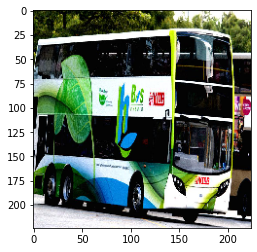

In [ ]:
plt.imshow(img_data[0].astype(int))

In [ ]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:300]=0
labels[300:]=1
names = ['HMV','LMV']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
#x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
#x = img_data
#y = Y
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2, random_state=2)
'''
image_input = Input(shape=(224,224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)
'''

"\nimage_input = Input(shape=(224,224, 3))\n\nmodel = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')\nmodel.summary()\nlast_layer = model.get_layer('fc2').output\nout = Dense(num_classes, activation='softmax', name='output')(last_layer)\ncustom_vgg_model = Model(image_input, out)\ncustom_vgg_model.summary()\n\nfor layer in custom_vgg_model.layers[:-1]:\n\tlayer.trainable = False\n\ncustom_vgg_model.layers[3].trainable\n\ncustom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])\n\n\nt=time.time()\n#\tt = now()\nhist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))\nprint('Training time: %s' % (t - time.time()))\n(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)\n"

In [ ]:
image_input = Input(shape=(224,224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()


553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

Epoch 1/12
15/15 [==============================] - 10s 189ms/step - loss: 0.7319 - accuracy: 0.7468 - val_loss: 0.5350 - val_accuracy: 0.8333
Epoch 2/12
15/15 [==============================] - 1s 90ms/step - loss: 0.1598 - accuracy: 0.9434 - val_loss: 0.3644 - val_accuracy: 0.8917
Epoch 3/12
15/15 [==============================] - 1s 90ms/step - loss: 0.1218 - accuracy: 0.9417 - val_loss: 0.5594 - val_accuracy: 0.8583
Epoch 4/12
15/15 [==============================] - 1s 89ms/step - loss: 0.1149 - accuracy: 0.9560 - val_loss: 0.4210 - val_accuracy: 0.8750
Epoch 5/12
15/15 [==============================] - 1s 89ms/step - loss: 0.0556 - accuracy: 0.9809 - val_loss: 0.3892 - val_accuracy: 0.8750
Epoch 6/12
15/15 [==============================] - 1s 89ms/step - loss: 0.0801 - accuracy: 0.9676 - val_loss: 0.3840 - val_accuracy: 0.8917
Epoch 7/12
15/15 [==============================] - 1s 99ms/step - loss: 0.0312 - accuracy: 0.9881 - val_loss: 0.5110 - val_accuracy: 0.8583
Epoch 8/12


In [ ]:
print('Accuracy of the model based on test data : {:.2f}%'.format(accuracy*100))

Accuracy of the model based on test data : 91.67%


Light Motor Vehicle


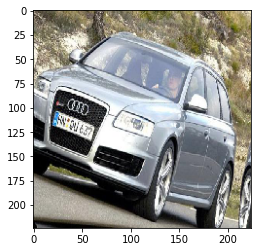

In [ ]:

test_img = img_to_array(load_img('/content/test/testset/000125.jpg',target_size = (224,224)))
test_img_feed = test_img.reshape(1,test_img.shape[0],test_img.shape[1],test_img.shape[2])
preds = custom_vgg_model.predict(test_img_feed)
#print(preds[0])

if preds[0][0]>preds[0][1]:
  print('Heavy Motor Vehicle')
else:
  print('Light Motor Vehicle')
plt.imshow(test_img.astype(int))


Heavy Motor Vehicle


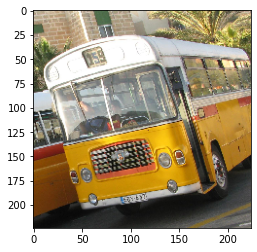

In [ ]:
test_img = img_to_array(load_img('/content/test/testset/000130.jpg',target_size = (224,224)))
test_img_feed = test_img.reshape(1,test_img.shape[0],test_img.shape[1],test_img.shape[2])
preds = custom_vgg_model.predict(test_img_feed)
#print(preds[0])

if preds[0][0]>preds[0][1]:
  print('Heavy Motor Vehicle')
else:
  print('Light Motor Vehicle')
plt.imshow(test_img.astype(int))


In [ ]:
custom_vgg_model.save('Classifier_Model',save_format='h5')

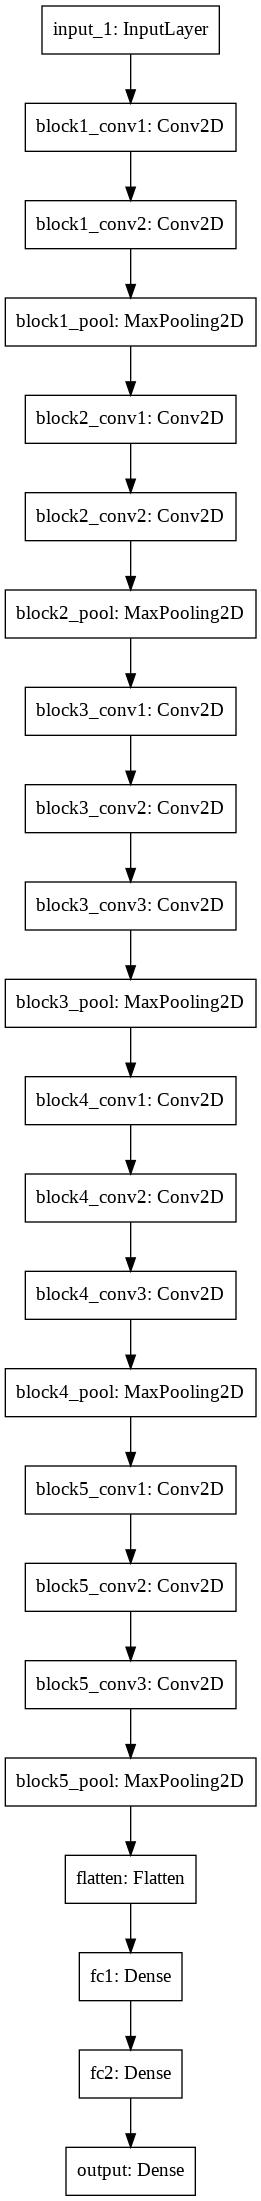

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(custom_vgg_model,to_file = 'plot.png')

In [ ]:
files.download('plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>